# CS-141 Homework 2

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

# Autosave work 
%load_ext autoreload
%autoreload 2
%autosave 180

Autosaving every 180 seconds



 The range in the x and y directions is (11,8) units 

(972, 1297, 3)

 The initial position vector x = [[2]
 [5]] 



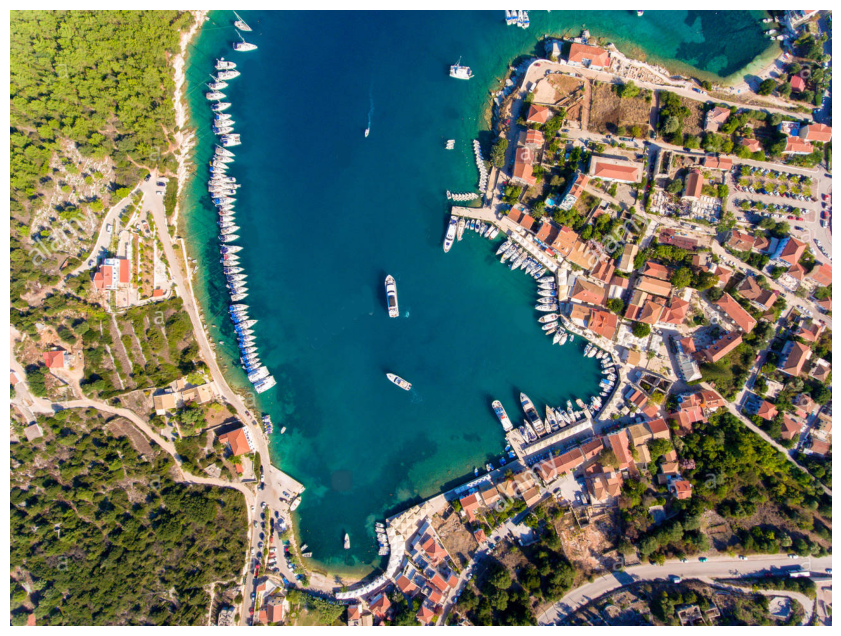

In [2]:
# Upload image of choice 
map = cv2.imread('BayMap.png')
# map = cv2.imread('CityMap.png')
# map = cv2.imread('MarioMap.png')
# print(map.shape) # printed as height, width 

# Calculate the range of the map
# NOTE: 1 unit = 50 pixels
m = 100 # images mxm pixels
dFOV = m # Field of view of the drone
sigma_movement = 5 # Movement from wind

range_x = ((map.shape[1]-dFOV)//2)//50
range_y = ((map.shape[0]-dFOV)//2)//50
print(f'\n The range in the x and y directions is ({range_x},{range_y}) units \n')

# Simulate a drone's starting position x and y
pos_x = np.random.randint(-9, 10)
# print(pos_x)
pos_y = np.random.randint(-9, 10)
# print(pos_y)
print(map.shape)
# pos_x = int(np.floor(np.random.rand()*(map.shape[1] - dFOV)))  
# pos_y = int(np.floor(np.random.rand()*(map.shape[0] - dFOV)))

state_ini = np.array([[pos_x], [pos_y]])
print(f'\n The initial position vector x = {state_ini} \n')

# cv2.circle(display_map, 
#                (center_x + int(new_pos[0]), center_y - int(new_pos[1])), 10, (255, 0, 0), -1)  # Red circle

# Show the image
plt.figure(figsize=(15, 8))
map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.imshow(map)
plt.axis("off")
plt.show()

748
736
The selected pixel ratio is m x m, or 100 x 100


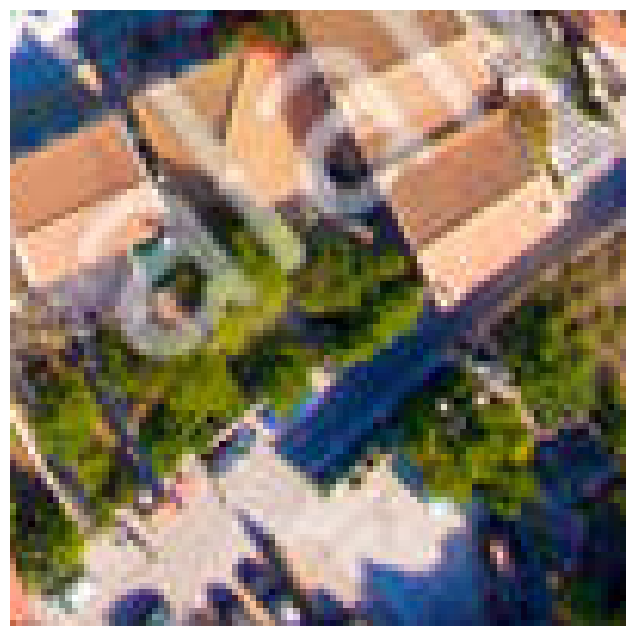

In [3]:
# Generate an RGB image for the x, y position 
# Images will be mxm pixels
# print(map.shape[1])
# print(map.shape[1]//2)
m = 100

# Specify the desired dimensions to crop specific picture
width_s = (pos_x*50) + map.shape[1]//2
print(width_s)
width_e = width_s + m # desired width in pixels
height_s = (pos_y*50) + map.shape[0]//2 
print(height_s)
height_e = height_s + m  # desired height in pixels

print('The selected pixel ratio is m x m, or', width_e-width_s, 'x', height_e-height_s)

# Crop the image 
true_pos = map[height_s:height_e, width_s:width_e] #, height_s:height_e]
# print(true_pos.shape)


# Show the true position image
plt.figure(figsize=(15, 8))
plt.imshow(true_pos)
plt.axis("off")
plt.show()



 Original position =  [[748]
 [736]]

 New position =  [[724.19690445]
 [779.86379366]]


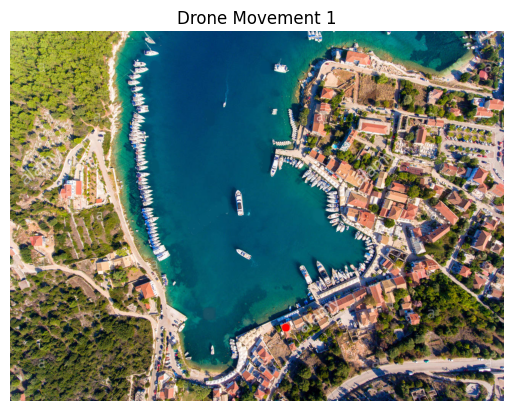


 New position =  [[716.68450845]
 [829.56342578]]


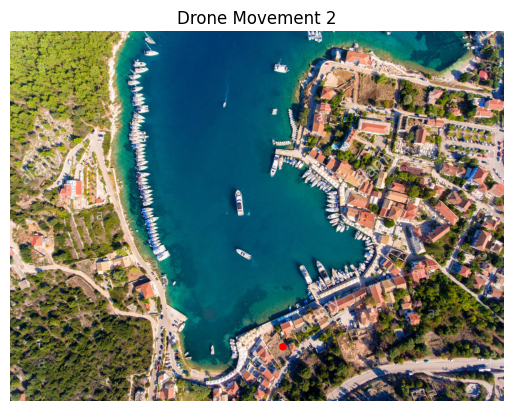


 New position =  [[668.8719914 ]
 [812.13677531]]


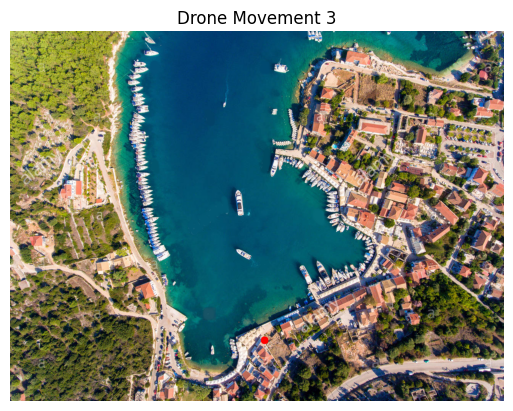

Final position =  [[668.8719914 ]
 [812.13677531]]


In [53]:
# Generate random movement in the x and y direction

def random_movement():
    """ Generates a random movement vector in the x and y direction, 
    such that dx^2 + dy^2 = 1.0
    Inputs: none
    Outputs: dx, dy
    """
    dx = np.random.uniform(-1, 1)
    posneg = np.random.choice([-1, 1])
    dy = (np.sqrt(1-dx**2))*posneg
    return dx,dy

def move_drone(pos,map, sigma_movement = 5):
    """ 
    Moves the drone a random distance dx, dy
    while checking to make sure it is in range of the map
    Inputs: Previous position, map
    OUtputs: new position 
    """
    dx,dy = random_movement()
    # print(dx)
    # print(dy)
    move_x = int(np.floor(dx*50)) + np.random.randn()*sigma_movement
    # print(move_x)
    move_y = int(np.floor(dy*50)) + np.random.randn()*sigma_movement
    # print(move_y)
    new_pos = pos + np.array([[move_x],[move_y]])
    # print(new_pos)

    while new_pos[0] > (map.shape[1]) or new_pos[1] > (map.shape[0]) or new_pos[0] < (0) or new_pos[1] < (0):
        print("Movement rejected, generating a new movement")
        dx,dy = random_movement()
        move_x = int(np.floor(dx*50)) + sigma_movement
        move_y = int(np.floor(dy*50)) + sigma_movement
        new_pos = pos + np.array([[move_x],[move_y]])
        # print(new_pos)

    return new_pos

def move_particle(pos,map, dx, dy):
    """ 
    Moves the drone a random distance dx, dy
    while checking to make sure it is in range of the map
    Inputs: Previous position, map
    OUtputs: new position 
    """
    move_x = int(np.floor(dx*50))
    # print(move_x)
    move_y = int(np.floor(dy*50))
    # print(move_y)
    # print(pos)
    new_pos = pos + np.array([[move_x],[move_y]])
    # print(new_pos)

    # while new_pos[0] > (map.shape[1]) or new_pos[1] > (map.shape[0]) or new_pos[0] < (0) or new_pos[1] < (0):
    #     print("Movement rejected, generating a new movement")
    #     dx,dy = random_movement()
    #     move_x = int(np.floor(dx*50)) + sigma_movement
    #     move_y = int(np.floor(dy*50)) + sigma_movement
    #     new_pos = pos + np.array([[move_x],[move_y]])
    #     # print(new_pos)

    return new_pos


posx = state_ini[0]*50 + map.shape[1]//2
posy = state_ini[1]*50 + map.shape[0]//2
pos = np.array([posx,posy])
print("\n Original position = ", pos)


# print(state_ini)
# print(pos)

new_pos = move_drone(pos,map)

# Simulate 5 movement 
for i in range(3):
    new_pos = move_drone(pos, map)
    
    # Plotting the map and the drone's new position
    display_map = map.copy()
    center_x = int(map.shape[1] / 2)  # Center of the map image
    center_y = int(map.shape[0] / 2)  # Center of the map image

    # Draw a circle at the new position (remember to adjust the coordinates)
    cv2.circle(display_map, 
               (int(new_pos[0]), int(new_pos[1])), 10, (255, 0, 0), -1)  # Red circle
    
    # Update the position for the next iteration
    print("\n New position = ", new_pos)
    pos = new_pos

    # Show the updated map
    plt.imshow(display_map)
    plt.title(f"Drone Movement {i + 1}")
    plt.axis('off')
    plt.show()

print("Final position = ", pos)





(225, 3)


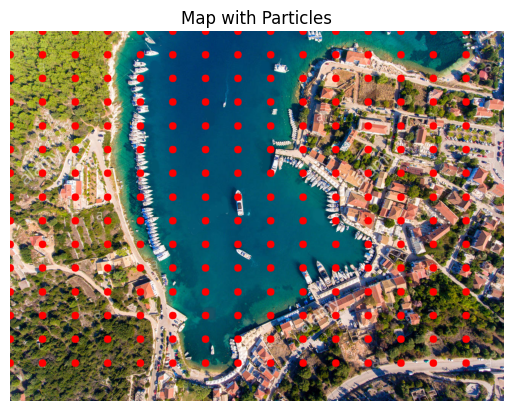

In [54]:
# Particle filter implementation
N = 15 #N*N particles, subject to change

# Generate a set P of N particles, uniformly distributed across the map 
x = np.linspace(0,map.shape[1]-dFOV,N)
y = np.linspace(0,map.shape[0]-dFOV,N)
# print(x)
# print(y)
particlePosArr = np.zeros([N**2,3]) #particle number, xpos, ypos

particleCount = 0
dispmap = map.copy()
for i in x:
    for j in y:
        particlePosArr[particleCount,:] = [particleCount, i, j]
        
        # Draw the particle on the map image
        cv2.circle(dispmap, (int(i), int(j)), 10, (255, 0, 0), -1)  # Red circles for particles
        
        particleCount += 1

print(particlePosArr.shape)
# print(particlePosArr[:,1])

# Display the map with particles
plt.imshow(dispmap)
plt.title('Map with Particles')
plt.axis('off')  # Turn off the axis
plt.show()


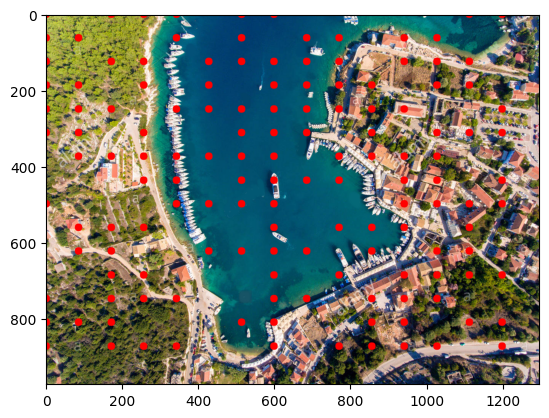

In [55]:
# Implement a function approximator for P(z|x) which you will use to set the weight for each particle 

# Initialize reference image 
# tp_diff = cv2.absdiff(
max_pixel_value = 255
num_pixels = true_pos.size  # total number of pixels
max_error = max_pixel_value * num_pixels/2

errors = []

# First, create an image for each particle 
for i in range(len(particlePosArr)):
    x = int(particlePosArr[i,1])
    # print(x)
    y = int(particlePosArr[i,2])
    # print(y)
    par_im = map[y:y+m,x:x+m]
    # Compare image to true position 
    # USING ABSOLUTE DIFFERENCE
    diff = cv2.absdiff(true_pos, par_im)
    # print(diff)
    # Sum the errors
    error = np.sum(diff)
    # print(error)
    # # Normalize the error
    # error_norm = error/max_error
    # print(error_norm)
    errors.append(error)

weights = np.array(errors)
epsilon = 1e-10
weights_i = 1 / (weights + epsilon)
# print(weights_i)

weights_i_n = weights_i / np.sum(weights_i)
# print(weights_i_n)

# Resample particles
num_particles = len(weights)
indices = np.random.choice(range(num_particles), size=num_particles, p=normalized_inverted_weights)

# Select the particles that correspond to the resampled indices
resampled_particles = particlePosArr[indices]
# print(resampled_particles)

map_with_particles = map.copy()

for i, particle in enumerate(resampled_particles):
    x = int(particle[1])  # x position
    y = int(particle[2])  # y position
    # size = int(weights_i_n[i])  # Scale for visibility; you can adjust this
    cv2.circle(map_with_particles, (x, y), 10, (255, 0, 0), -1)  # Draw filled circle in red


plt.imshow(map_with_particles)

# Scatter plot the particle positions
# plt.scatter(resampled_particles[:, 1], resampled_particles[:, 2], color='red', marker='o', label='Particles')
plt.show()

# # errors /= np.sum(errors)
# print("Max weight",max(inverted_weights))  
# print("Min weight",min(inverted_weights))  
# # print(particlePosArr[:,14])

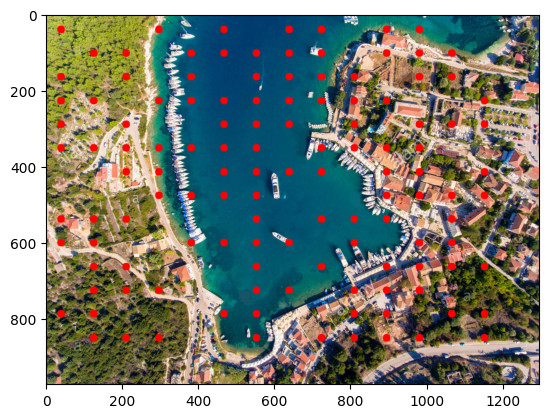

In [57]:
# Move each particle according to the known movement vector dx dy
dx,dy = random_movement()
map_with_particles = map.copy()
for i in range(len(resampled_particles)):
    particle = resampled_particles[i, 1:3].reshape(2,1)
    newpos = move_particle(particle,map,dx,dy)
    # print(newpos)
    x = int(newpos[0])  # x position
    y = int(newpos[1])  # y position
    cv2.circle(map_with_particles, (x, y), 10, (255, 0, 0), -1)  # Draw filled circle in red

    # print(particle)
    # print(i)

plt.imshow(map_with_particles)
plt.show()

-4.16973251277819
